In [27]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
%matplotlib inline

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\ryanc\anaconda3\envs\pyvizenv2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [28]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AAPL','MSFT','AMZN','FB','GOOGL','GOOG','TSLA','JPM','JNJ']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [29]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df['date'] = pd.to_datetime(df.date).dt.date
df

,ticker,date,time,title
0,AAPL,2021-05-11,08:47PM,Dow Jones Futures Await Inflation Data After M...
1,AAPL,2021-05-11,08:46PM,Apple Claims Its App Store Blocked Over $1.5 B...
2,AAPL,2021-05-11,08:35PM,UPDATE 1-FCC studying impact on chips shortage...
3,AAPL,2021-05-11,07:23PM,Apple pushes back against Epic claims to defen...
4,AAPL,2021-05-11,06:00PM,Here's why this trader is shorting Apple stock...
5,AAPL,2021-05-11,04:17PM,"Earnings Roundup: Facebook, Amazon, and Shopify"
6,AAPL,2021-05-11,04:10PM,4 Dow Jones Stocks To Buy And Watch In May 202...
7,AAPL,2021-05-11,02:55PM,Is Apple Stock A Buy After Its Monster March-Q...
8,AAPL,2021-05-11,02:23PM,Big Tech Join Intel To Seek Congressional Fund...
9,AAPL,2021-05-11,01:00PM,"Apple Defends App Review, Payment System to De..."


In [30]:
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ryanc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0      0.1027
1     -0.6486
2     -0.2500
3      0.0000
4      0.0000
5      0.1779
6     -0.5423
7      0.0000
8      0.2960
9      0.0000
10     0.0000
11     0.3612
12     0.4588
13     0.0000
14    -0.6908
15    -0.2500
16     0.0000
17     0.0000
18    -0.6249
19     0.2960
20     0.2960
21     0.0000
22     0.2960
23     0.0000
24    -0.4939
25     0.0000
26     0.1280
27     0.0000
28     0.0000
29     0.0258
        ...  
870    0.0000
871    0.0000
872    0.0000
873    0.0000
874    0.0000
875    0.2023
876    0.2023
877    0.0000
878    0.0000
879   -0.0516
880    0.3182
881    0.4767
882    0.0000
883   -0.3818
884    0.0000
885    0.5106
886    0.0000
887   -0.2960
888    0.4215
889   -0.0772
890    0.0000
891   -0.5994
892   -0.5574
893    0.0000
894    0.4404
895    0.0000
896    0.0000
897    0.3400
898    0.7351
899    0.4404
Name: compound, Length: 900, dtype: float64

In [31]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
#mean_df = df.groupby(['ticker', 'date']).mean().unstack().dropna(axis='columns', thresh=7)
mean_df

compound                                                         \
date   2021-04-20 2021-04-21 2021-04-22 2021-04-23 2021-04-24 2021-04-26   
ticker                                                                     
AAPL          NaN        NaN        NaN        NaN        NaN        NaN   
AMZN          NaN        NaN        NaN        NaN        NaN        NaN   
FB            NaN        NaN        NaN        NaN        NaN        NaN   
GOOG          NaN        NaN        NaN        NaN        NaN        NaN   
GOOGL         NaN        NaN        NaN        NaN        NaN        NaN   
JNJ           NaN        NaN        NaN        NaN        NaN        NaN   
JPM        0.4767    0.17159   0.227375   0.564633    -0.0258   0.039925   
MSFT          NaN        NaN        NaN        NaN        NaN        NaN   
TSLA          NaN        NaN        NaN        NaN        NaN        NaN   

                                                    ...                        \
date   2021-04-27 2021-04-28 2021-04-29 2021-04-30  ... 2021-05-02 2021-05-03   
ticker                                              ...                         
AAPL          NaN        NaN        NaN        NaN  ...        NaN        NaN   
AMZN          NaN        NaN        NaN        NaN  ...        NaN        NaN   
FB            NaN        NaN        NaN        NaN  ...        NaN        NaN   
GOOG          NaN        NaN        NaN        NaN  ...        NaN        NaN   
GOOGL         NaN        NaN        NaN        NaN  ...        NaN        NaN   
JNJ           NaN   0.505167  -0.041344   0.052373  ...    0.00000  -0.075308   
JPM      0.157211   0.000000   0.345850   0.000000  ...    0.61240   0.345400   
MSFT          NaN        NaN        NaN  -0.067967  ...   -0.26556   0.024947   
TSLA          NaN        NaN        NaN        NaN  ...        NaN        NaN   

                                                                          \
date   2021-05-04 2021-05-05 2021-05-06 2021-05-07 2021-05-08 2021-05-09   
ticker                                                                     
AAPL          NaN   0.055575  -0.042785  -0.013015   0.167520  -0.106067   
AMZN          NaN        NaN   0.064069   0.111990   0.139600   0.098460   
FB            NaN  -0.182379  -0.106281  -0.092129   0.000000   0.121150   
GOOG          NaN   0.020550  -0.013175   0.003855   0.000000  -0.106067   
GOOGL         NaN   0.025967  -0.012548   0.004058   0.000000  -0.106067   
JNJ      0.045307   0.114336   0.049729   0.342018        NaN  -0.016400   
JPM     -0.026650   0.286838   0.000000   0.146314        NaN  -0.318200   
MSFT     0.179093   0.201000  -0.040929  -0.151243  -0.132600   0.204133   
TSLA          NaN        NaN        NaN  -0.065367  -0.160225   0.067587   

                              
date   2021-05-10 2021-05-11  
ticker                        
AAPL     0.287525  -0.038854  
AMZN     0.086416   0.088916  
FB      -0.052336   0.003264  
GOOG     0.084106   0.078815  
GOOGL    0.084106   0.078815  
JNJ     -0.050510   0.160533  
JPM      0.101371  -0.136678  
MSFT     0.088600   0.173062  
TSLA    -0.019495   0.003679  

[9 rows x 21 columns]

<Figure size 720x576 with 0 Axes>

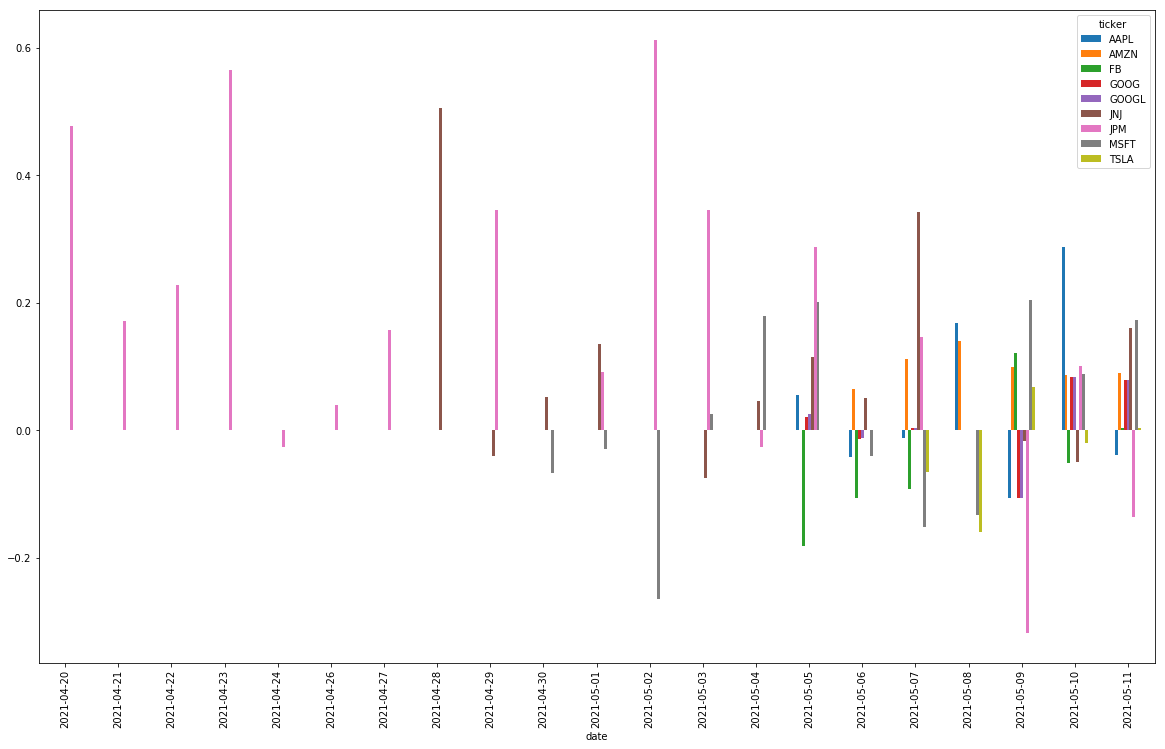

In [32]:
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar', figsize=(20, 12))
plt.show()

In [33]:
df2 =(df.groupby(['ticker', 'date']).mean())
df2

compound
ticker date                
AAPL   2021-05-05  0.055575
       2021-05-06 -0.042785
       2021-05-07 -0.013015
       2021-05-08  0.167520
       2021-05-09 -0.106067
       2021-05-10  0.287525
       2021-05-11 -0.038854
AMZN   2021-05-06  0.064069
       2021-05-07  0.111990
       2021-05-08  0.139600
       2021-05-09  0.098460
       2021-05-10  0.086416
       2021-05-11  0.088916
FB     2021-05-05 -0.182379
       2021-05-06 -0.106281
       2021-05-07 -0.092129
       2021-05-08  0.000000
       2021-05-09  0.121150
       2021-05-10 -0.052336
       2021-05-11  0.003264
GOOG   2021-05-05  0.020550
       2021-05-06 -0.013175
       2021-05-07  0.003855
       2021-05-08  0.000000
       2021-05-09 -0.106067
       2021-05-10  0.084106
       2021-05-11  0.078815
GOOGL  2021-05-05  0.025967
       2021-05-06 -0.012548
       2021-05-07  0.004058
...                     ...
JPM    2021-04-28  0.000000
       2021-04-29  0.345850
       2021-04-30  0.000000
       2021-05-01  0.091067
       2021-05-02  0.612400
       2021-05-03  0.345400
       2021-05-04 -0.026650
       2021-05-05  0.286838
       2021-05-06  0.000000
       2021-05-07  0.146314
       2021-05-09 -0.318200
       2021-05-10  0.101371
       2021-05-11 -0.136678
MSFT   2021-04-30 -0.067967
       2021-05-01 -0.029425
       2021-05-02 -0.265560
       2021-05-03  0.024947
       2021-05-04  0.179093
       2021-05-05  0.201000
       2021-05-06 -0.040929
       2021-05-07 -0.151243
       2021-05-08 -0.132600
       2021-05-09  0.204133
       2021-05-10  0.088600
       2021-05-11  0.173062
TSLA   2021-05-07 -0.065367
       2021-05-08 -0.160225
       2021-05-09  0.067587
       2021-05-10 -0.019495
       2021-05-11  0.003679

[84 rows x 1 columns]

In [34]:
def score(row):
    if row['compound'] > 0.05:
        signal = 1
    elif row['compound'] < -0.05:
        signal = -1
    else:
        signal = 0     
    return signal


df2['Signal'] = df2.apply(score, axis=1)
df2['Action'] = ["Buy" if x == 1 else "Sell" if x== -1 else "Hold" for x in df2['Signal']] 
df2

compound  Signal Action
ticker date                               
AAPL   2021-05-05  0.055575       1    Buy
       2021-05-06 -0.042785       0   Hold
       2021-05-07 -0.013015       0   Hold
       2021-05-08  0.167520       1    Buy
       2021-05-09 -0.106067      -1   Sell
       2021-05-10  0.287525       1    Buy
       2021-05-11 -0.038854       0   Hold
AMZN   2021-05-06  0.064069       1    Buy
       2021-05-07  0.111990       1    Buy
       2021-05-08  0.139600       1    Buy
       2021-05-09  0.098460       1    Buy
       2021-05-10  0.086416       1    Buy
       2021-05-11  0.088916       1    Buy
FB     2021-05-05 -0.182379      -1   Sell
       2021-05-06 -0.106281      -1   Sell
       2021-05-07 -0.092129      -1   Sell
       2021-05-08  0.000000       0   Hold
       2021-05-09  0.121150       1    Buy
       2021-05-10 -0.052336      -1   Sell
       2021-05-11  0.003264       0   Hold
GOOG   2021-05-05  0.020550       0   Hold
       2021-05-06 -0.013175       0   Hold
       2021-05-07  0.003855       0   Hold
       2021-05-08  0.000000       0   Hold
       2021-05-09 -0.106067      -1   Sell
       2021-05-10  0.084106       1    Buy
       2021-05-11  0.078815       1    Buy
GOOGL  2021-05-05  0.025967       0   Hold
       2021-05-06 -0.012548       0   Hold
       2021-05-07  0.004058       0   Hold
...                     ...     ...    ...
JPM    2021-04-28  0.000000       0   Hold
       2021-04-29  0.345850       1    Buy
       2021-04-30  0.000000       0   Hold
       2021-05-01  0.091067       1    Buy
       2021-05-02  0.612400       1    Buy
       2021-05-03  0.345400       1    Buy
       2021-05-04 -0.026650       0   Hold
       2021-05-05  0.286838       1    Buy
       2021-05-06  0.000000       0   Hold
       2021-05-07  0.146314       1    Buy
       2021-05-09 -0.318200      -1   Sell
       2021-05-10  0.101371       1    Buy
       2021-05-11 -0.136678      -1   Sell
MSFT   2021-04-30 -0.067967      -1   Sell
       2021-05-01 -0.029425       0   Hold
       2021-05-02 -0.265560      -1   Sell
       2021-05-03  0.024947       0   Hold
       2021-05-04  0.179093       1    Buy
       2021-05-05  0.201000       1    Buy
       2021-05-06 -0.040929       0   Hold
       2021-05-07 -0.151243      -1   Sell
       2021-05-08 -0.132600      -1   Sell
       2021-05-09  0.204133       1    Buy
       2021-05-10  0.088600       1    Buy
       2021-05-11  0.173062       1    Buy
TSLA   2021-05-07 -0.065367      -1   Sell
       2021-05-08 -0.160225      -1   Sell
       2021-05-09  0.067587       1    Buy
       2021-05-10 -0.019495       0   Hold
       2021-05-11  0.003679       0   Hold

[84 rows x 3 columns]